## **Diagnosis of Presence of Heart Disease Based on Age, Cholesterol, And Resting Blood Pressure**

**Names:** Srijan Sanghera, Sharon Feng, Annie Wang, Mairin Leitch

### **Introduction**
Coronary artery disease (CAD), characterized by the narrowing of coronary arteries, demand accurate diagnostic tools for timely intervention and treatment (Detrano, Robert C. et al.,1989). Traditionally, this has been achieved through invasive procedures like angiography. However, there is a growing interest in developing non-invasive methods that utilize patient demographics and basic clinical information for CAD diagnosis. This study aims to address this need by evaluating the diagnosis of the presence of heart disease using essential parameters: age, cholesterol levels, and resting blood pressure based on the database from Hungarian Institute. <br> 

Our chosen data set was collected by Andras Janosi, M.D. in the Hungarian Institute of Cardiology, Budapest and is applicable for heart disease diagnosis. 

**Research Question:** Is the given new patient having heart disease or not based on their Age, Cholesterol, and Resting Blood Pressure?

### **Exploratory Analysis**

In [2]:
#import packages:
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [3]:
#loading data in:
URL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
heart <- read_delim(URL, delim = ",", col_names = FALSE) |>
        rename(age = X1, sex = X2, cp = X3, trestbps = X4, chol = X5, fbs = X6, restecg = X7, thalach = X8, exang = X9,
               oldpeak = X10, slope = X11, ca = X12, thal = X13, num_predicted = X14)

#Cleaning and wrangling data:
heart_data <- heart |>
    select(age, chol, trestbps, num_predicted) |>
    filter(chol != "?", trestbps != "?") |>
    mutate(num_predicted = as.factor(num_predicted),
           num_predicted = fct_recode(num_predicted, "present" = "1", "absent" = "0"),
           chol = as.numeric(chol),
           trestbps = as.numeric(trestbps))
head(heart_data)

#split data into training and testing: 
set.seed(1111) 
heart_split <- initial_split(heart_data, prop = 0.75, strata = num_predicted)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)


Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,chol,trestbps,num_predicted
<dbl>,<dbl>,<dbl>,<fct>
28,132,130,absent
29,243,120,absent
30,237,170,absent
31,219,100,absent
32,198,105,absent
32,225,110,absent


In [3]:
#Summarize:
disease_vs_healthy <- heart_train |>
    group_by(num_predicted) |>
    summarize(count = n(), 
              min_age = min(age), max_age = max(age), mean_age = mean(age),
              min_chol = min(chol), max_chol = max(chol), mean_chol = mean(chol),
              min_trestbsp = min(trestbps), max_trestbps = max(trestbps), mean_trestbps = mean(trestbps))
disease_vs_healthy

NA_summary <- heart |>
    group_by(num_predicted) |>
    summarize(total_age_NA_deleted = sum(age == "?"),
              total_chol_NA_deleted = sum(chol == "?"),
              total_trestbps_NA_deleted = sum(trestbps == "?"))
NA_summary

num_predicted,count,min_age,max_age,mean_age,min_chol,max_chol,mean_chol,min_trestbsp,max_trestbps,mean_trestbps
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
absent,126,28,62,47.05556,85,468,239.4286,100,180,130.0476
present,75,31,65,49.01333,156,603,269.9200,100,200,135.2267


num_predicted,total_age_NA_deleted,total_chol_NA_deleted,total_trestbps_NA_deleted
<dbl>,<int>,<int>,<int>
0,0,18,1
1,0,5,0


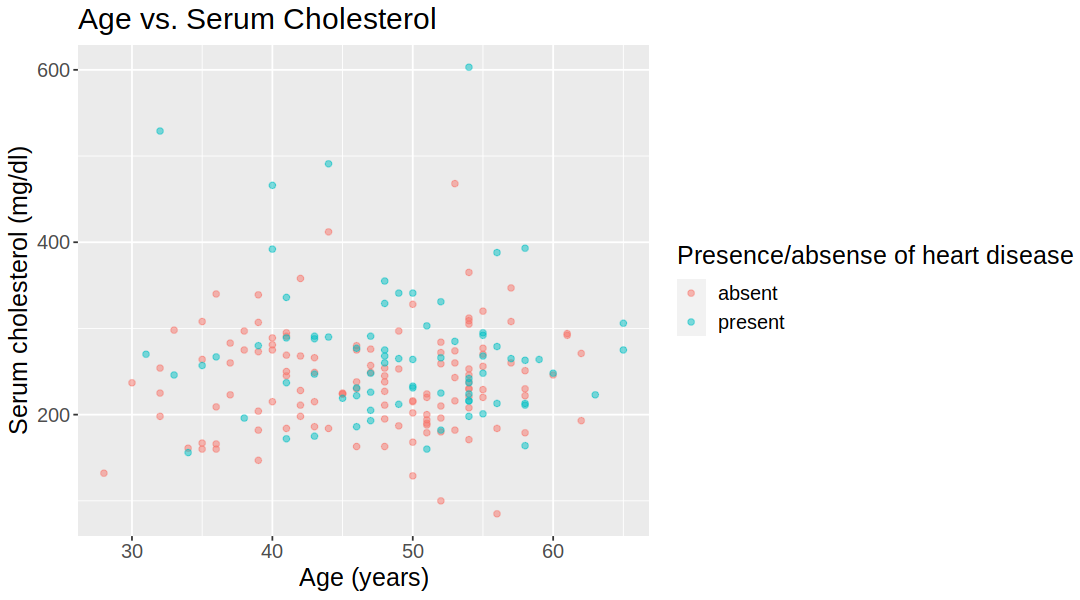

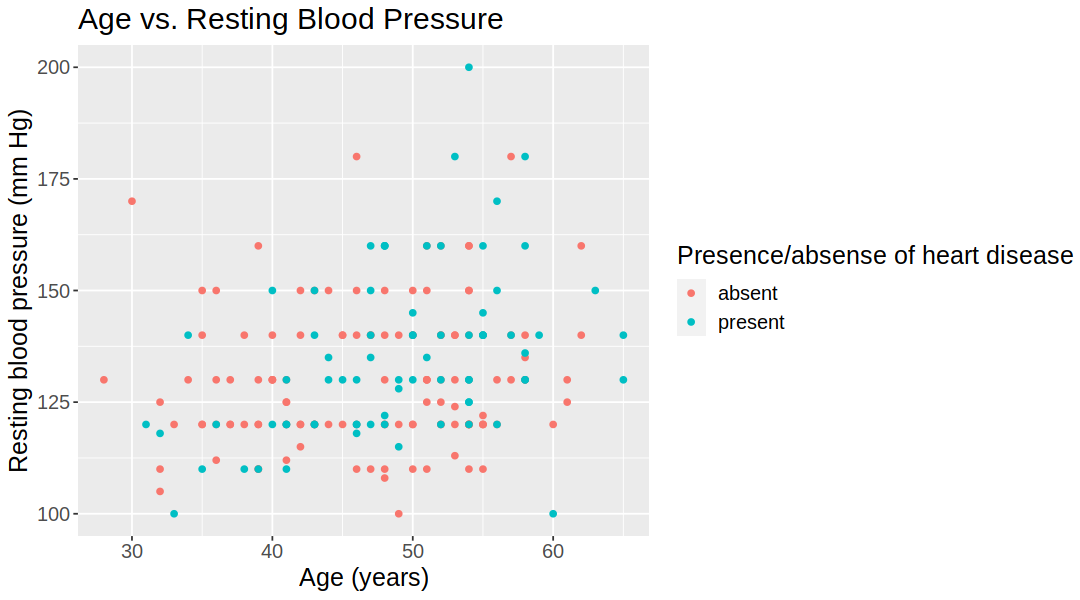

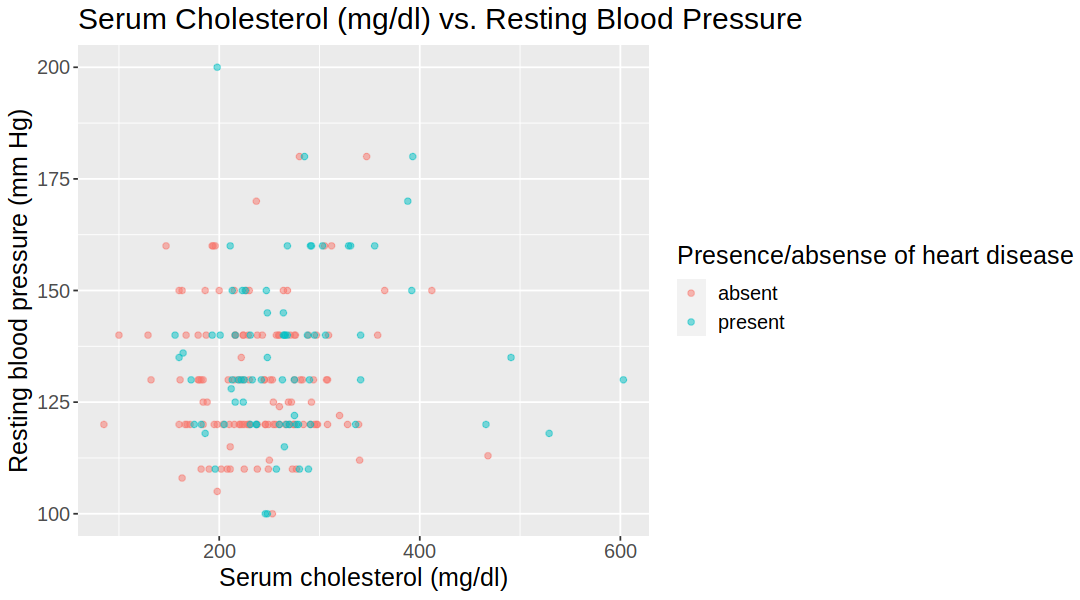

In [4]:
#visualising training data
options(repr.plot.width = 9, repr.plot.height = 5) 


# Visualizing Age vs. Serum Cholesterol
age_vs_cholesterol <- heart_train |>
    ggplot(aes(x = age, y = chol, color = num_predicted)) +
    geom_point(alpha = 0.5) +
    labs(x = "Age (years)", y = "Serum cholesterol (mg/dl)", color = "Presence/absense of heart disease") +
    ggtitle("Age vs. Serum Cholesterol") +
    theme(text = element_text(size=15))
age_vs_cholesterol

# Visualizing Age vs. Resting Blood Pressure
age_vs_trestbps <- heart_train |>
    ggplot(aes(x = age, y = trestbps, color = num_predicted)) +
    geom_point() +
    labs(x = "Age (years)", y = "Resting blood pressure (mm Hg)", color = "Presence/absense of heart disease") +
    ggtitle("Age vs. Resting Blood Pressure") +
    theme(text = element_text(size=15))
age_vs_trestbps


# Visualizing Serum Cholesterol (mg/dl) vs. Resting Blood Pressure
chol_vs_trestbps <- heart_train |>
    ggplot(aes(x = chol, y = trestbps, color = num_predicted)) +
    geom_point(alpha = 0.5) +
    labs(x = "Serum cholesterol (mg/dl)", y = "Resting blood pressure (mm Hg)", color = "Presence/absense of heart disease") +
    ggtitle("Serum Cholesterol (mg/dl) vs. Resting Blood Pressure") +
    theme(text = element_text(size=15))
chol_vs_trestbps

### **Methods**

We utilized the "processed.hungary.data" from the Heart Disease Database. Our predictive variables include age (years), chol (serum cholesterol in mg/dL), and trestbps (resting blood pressure in mmHg) to predict if heart disease is present (1) or absent (0) in Hungarian patients. We imported the dataset into a Jupyter Notebook from the website and conducted data preprocessing to filter the relevant variables, handle missing data, and adjust data types. A 75% training and 25% testing data split was performed. Preliminary exploratory analysis included summary statistics and visualization using scatter plots: Age vs. Serum Cholesterol, Age vs. Resting Blood Pressure, and Serum Cholesterol vs. Resting Blood Pressure.

Then we need to find the ideal "k" value for k-nearest neighbors, maximizing prediction accuracy through the recipe function, cross-validation, the k-nearest neighbor algorithm, and a workflow on our training data. Then, we will predict our category (1 or 0) using our model and the testing data, and analyze our findings in a report. 

We plan to create a scatterplot to assess potential overfitting or underfitting. We will color code the graph's background based on the model's predictions. We will repeat this for all of our variables (age vs. blood pressure, age vs. cholesterol, cholesterol vs. blood pressure). By comparing the graphs, we can determine which variables are more accurate in predicting the presence of heart disease, and the strengths and limitations of our model. 


### **Expected outcomes and significance**
From this data analysis of heart disease in Hungary, conclusions can be drawn as to how likely a person will be diagnosed with heart disease based on their resting blood pressure, serum cholesterol levels, and age. We expect to find a positive relationship between our predictor values (blood pressure, cholesterol levels, age) and the presence of heart disease, and a relatively accurate prediction using this classification model. 

These findings can help doctors in Hungary accurately diagnose heart disease patients without using invasive procedures. Also doctors can start to place a higher emphasis on more related parameters during symptom check-ups using the conclusion from this study. Focusing on region-specific data (Hungary) can help doctors benefit the health of the populations they treat.

Our analysis can prompt the exploration of new questions. For example, how can we use this data to diagnose specific heart conditions (i.e. atherosclerosis, angina, coronary heart disease, etc.) rather than just the general presence of a disease? Are other factors more accurate in a heart disease diagnosis than the ones we are identifying? More specific research questions can be pursued as a result of this analysis. 


##### **References**:
Detrano, Robert C. et al. “International application of a new probability algorithm for the diagnosis of coronary artery disease.” The American journal of cardiology 64 5 (1989): 304-10 .